In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [5]:
IMG = '../../../img'

In [33]:
def plot_image(img1, img2, title1='Original', title2='New'):
    plt.figure(figsize=(5, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap="gray")
    plt.title(title1)
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap="gray")
    plt.title(title2)
    plt.tight_layout()
    plt.show()

In [38]:
def plot_hist(old, new, title_old='Original', title_new='New'):
    intensity_values = np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(
        intensity_values, 
        cv2.calcHist([old], [0], None, [256], [0, 256])[:, 0],
        width=5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(
        intensity_values,
        cv2.calcHist([new], [0], None, [256], [0, 256])[:, 0],
        width=5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.tight_layout()
    plt.show()

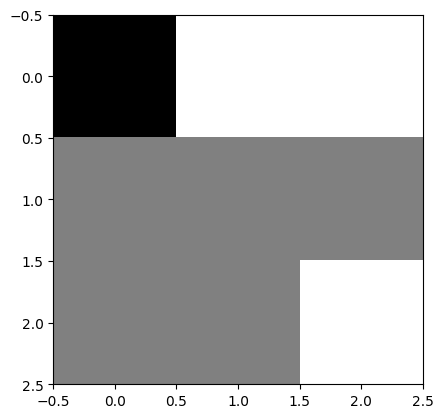

toy_image:
[[0 2 2]
 [1 1 1]
 [1 1 2]]


In [10]:
toy_image = np.array([[0, 2, 2], [1, 1, 1], [1, 1, 2]], dtype=np.uint8)
plt.imshow(toy_image, cmap='gray')
plt.show()
print(f'toy_image:\n{toy_image}')

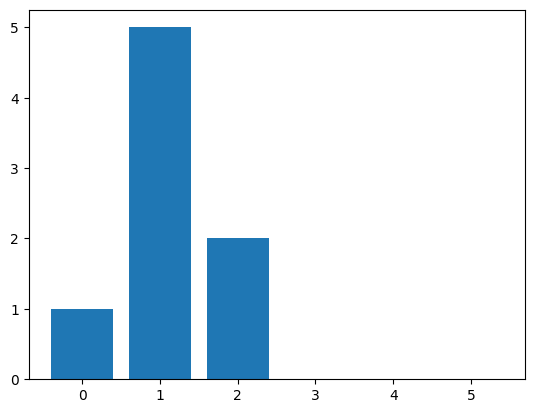

In [11]:
plt.bar([x for x in range(6)], [1, 5, 2, 0, 0, 0]);

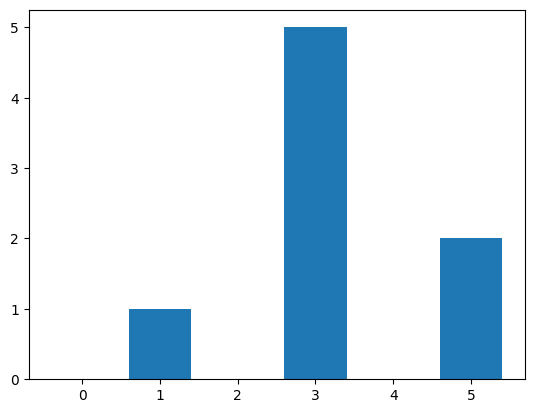

In [12]:
plt.bar([x for x in range(6)], [0, 1, 0, 5, 0, 2]);

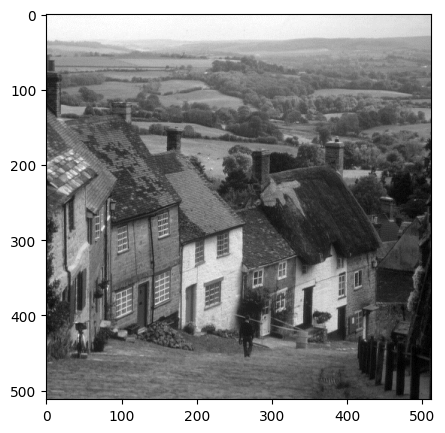

In [13]:
goldhill = cv2.imread(f'{IMG}/goldhill.bmp', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(5, 5))
plt.imshow(goldhill, cmap='gray');

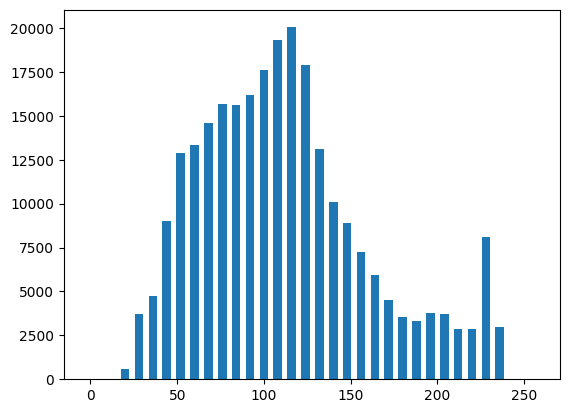

In [14]:
hist = cv2.calcHist([goldhill], [0], None, [256], [0, 256])
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:, 0], width=5);

In [15]:
PMF = hist / (goldhill.shape[0] * goldhill.shape[1])

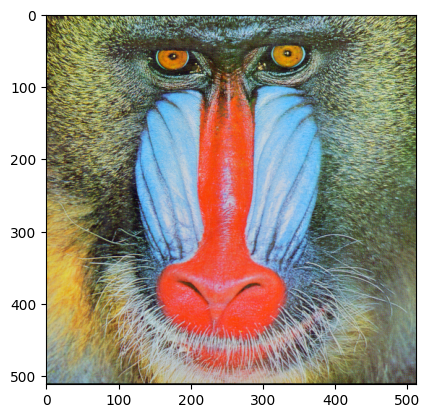

In [16]:
baboon = cv2.imread(f'{IMG}/baboon.png')
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB));

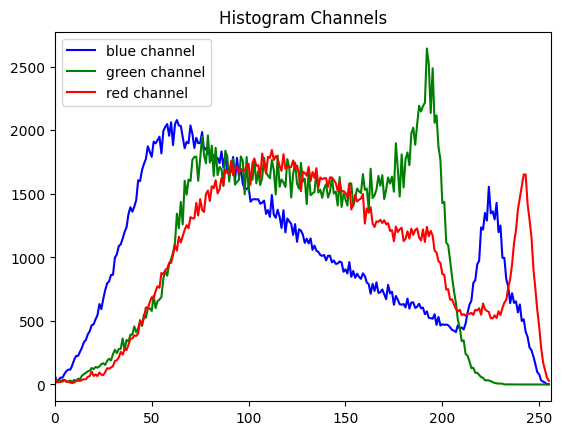

In [17]:
color = ('blue', 'green', 'red')
for i, col in enumerate(color):
    histr = cv2.calcHist([baboon], [i], None, [256], [0, 256])
    plt.plot(intensity_values, histr, color=col,label=f'{col} channel')
    plt.xlim([0, 256])
plt.legend()
plt.title('Histogram Channels');

In [19]:
neg_toy_image = 255 - toy_image
print(f'neg toy image\n{neg_toy_image}')

neg toy image
[[255 253 253]
 [254 254 254]
 [254 254 253]]


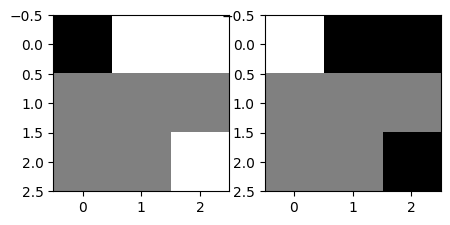

In [20]:
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1) 
plt.imshow(toy_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(neg_toy_image, cmap='gray');

In [25]:
!open ../../../img/

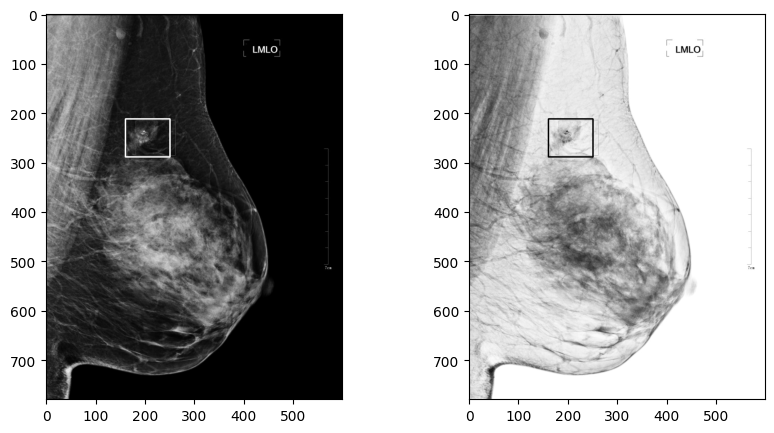

In [29]:
image = cv2.imread(f'{IMG}/mammogram.png', cv2.IMREAD_GRAYSCALE)
cv2.rectangle(
    image, pt1=(160, 212), pt2=(250, 289), color=(255), thickness=2)
mam_neg = 255 - image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(mam_neg, cmap='gray');

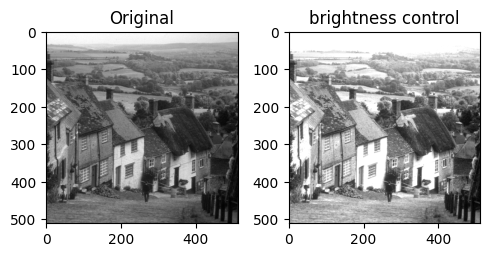

In [35]:
alpha = 1   # Simple contrast control
beta = 100  # Simple brightness control   
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)
plot_image(goldhill, new_image, title2 = 'brightness control')

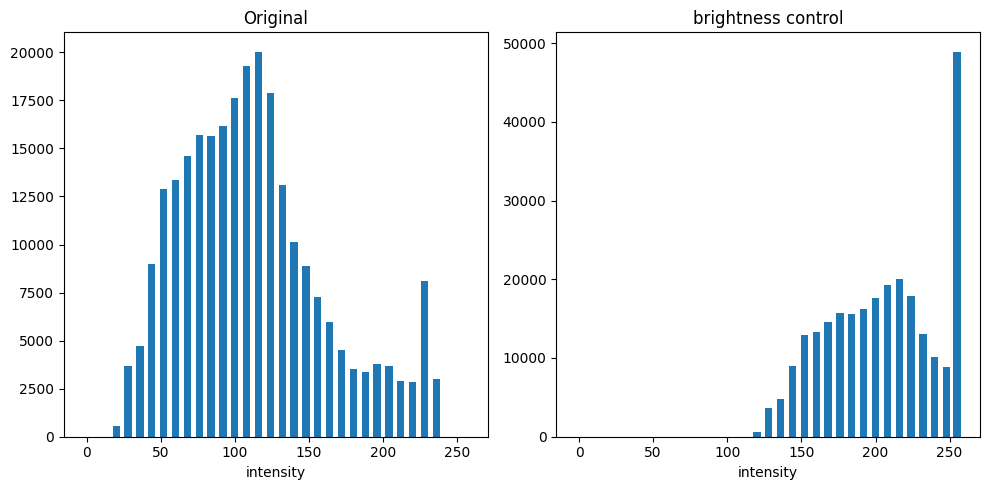

In [40]:
plt.figure(figsize=(10, 5))
plot_hist(goldhill, new_image, title_new='brightness control')

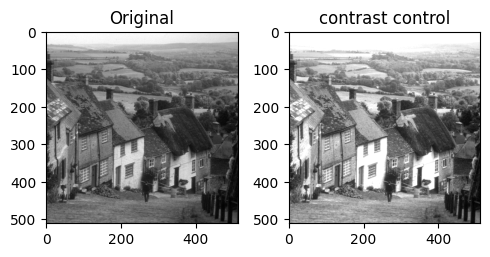

In [42]:
alpha = 1.5  # Simple contrast control
beta = 0   # Simple brightness control   # Simple brightness control
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)
plot_image(goldhill, new_image, title2='contrast control')

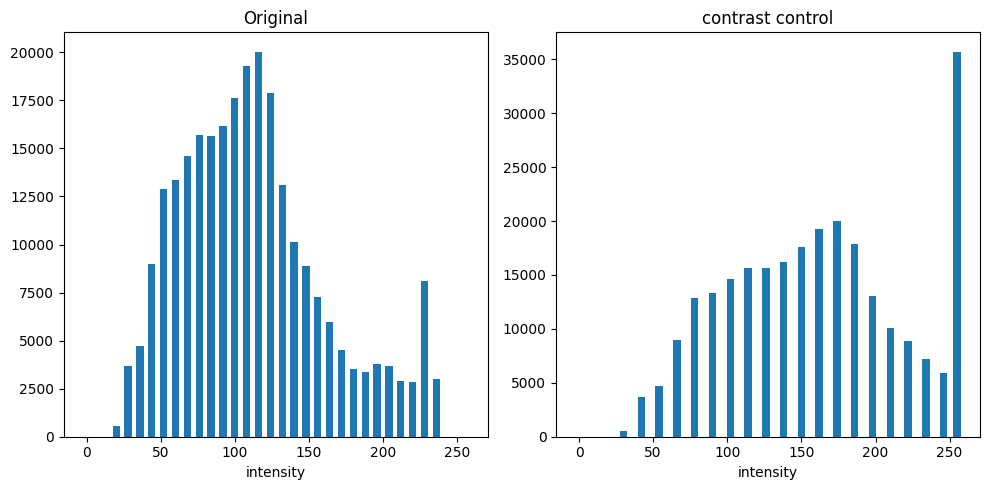

In [43]:
plt.figure(figsize=(10, 5))
plot_hist(goldhill, new_image, title_new='contrast control')

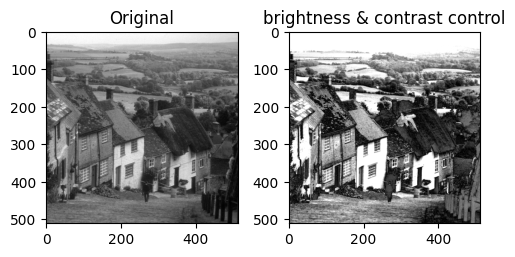

In [44]:
alpha = 3 # Simple contrast control
beta = -200  # Simple brightness control   
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)
plot_image(goldhill, new_image, title2='brightness & contrast control')

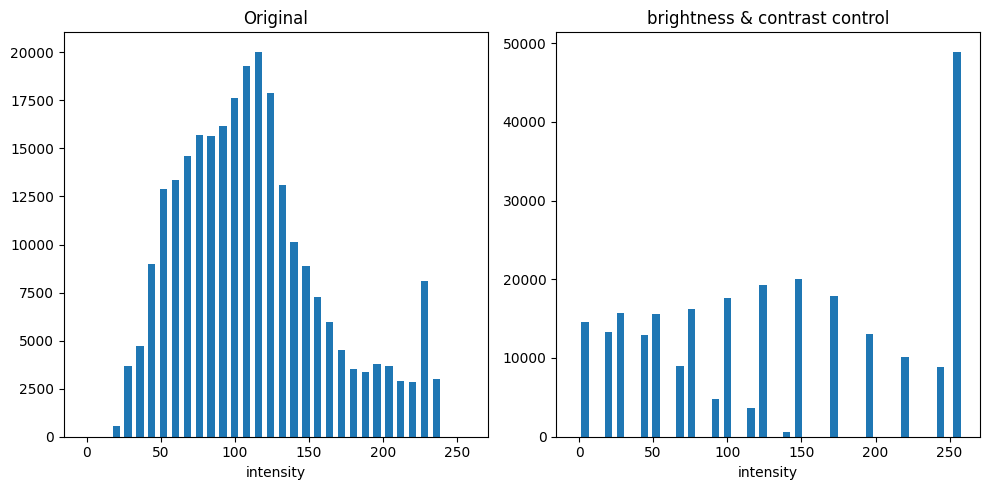

In [45]:
plt.figure(figsize=(10, 5))
plot_hist(
    goldhill, new_image, title_new='brightness & contrast control')

In [47]:
!open ../../../img

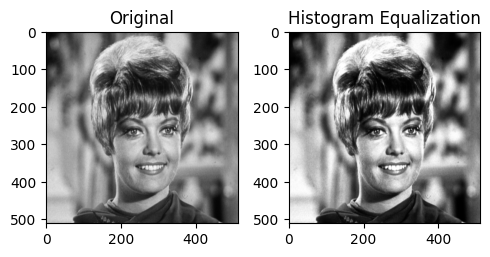

In [48]:
zelda = cv2.imread(f'{IMG}/zelda.png',cv2.IMREAD_GRAYSCALE)
new_image = cv2.equalizeHist(zelda)
plot_image(zelda, new_image, title2='Histogram Equalization')

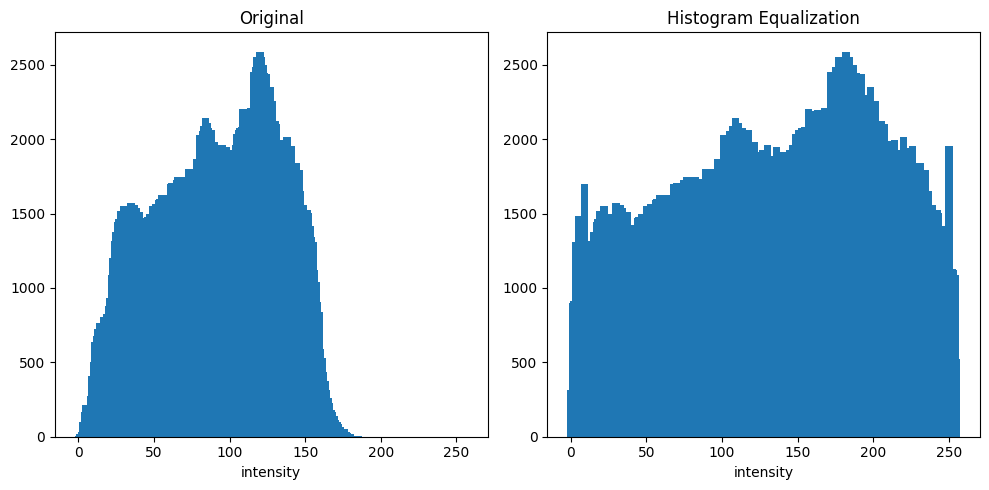

In [50]:
plt.figure(figsize=(10, 5))
plot_hist(zelda, new_image, title_new='Histogram Equalization')

In [51]:
def thresholding(input_img, threshold, max_value=255, min_value=0):
    N, M=input_img.shape
    image_out=np.zeros((N, M), dtype=np.uint8)
    for i in range(N):
        for j in range(M):
            if input_img[i, j] > threshold:
                image_out[i, j] = max_value
            else:
                image_out[i, j] = min_value
    return image_out

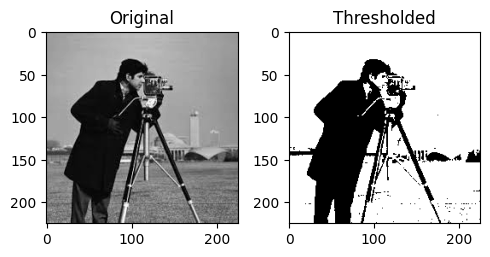

In [54]:
image = cv2.imread(f'{IMG}/cameraman.jpeg', cv2.IMREAD_GRAYSCALE)
threshold = 87
max_value = 255
min_value = 0
new_image = thresholding(
    image, 
    threshold=threshold, 
    max_value=max_value, 
    min_value=min_value)
plot_image(image, new_image, title2='Thresholded')

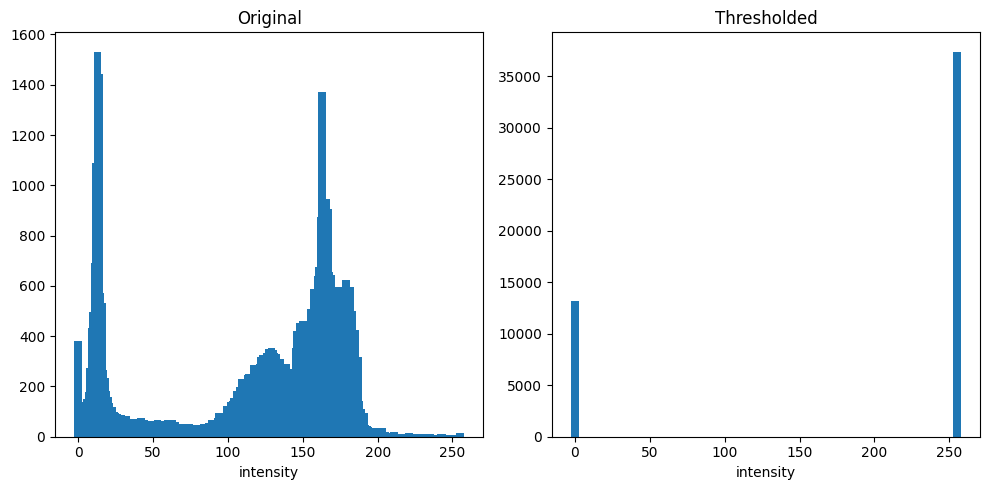

In [55]:
plt.figure(figsize=(10, 5))
plot_hist(image, new_image, title_new='Thresholded')

thresh: 87.0


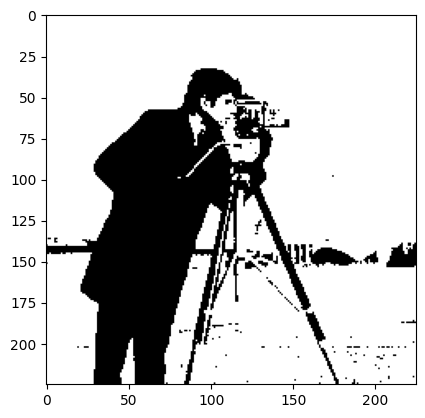

In [58]:
thresh, new_image = cv2.threshold(
    image, threshold, max_value, cv2.THRESH_BINARY)
print('thresh:', thresh)
plt.imshow(new_image, cmap='gray');

thresh: 86.0


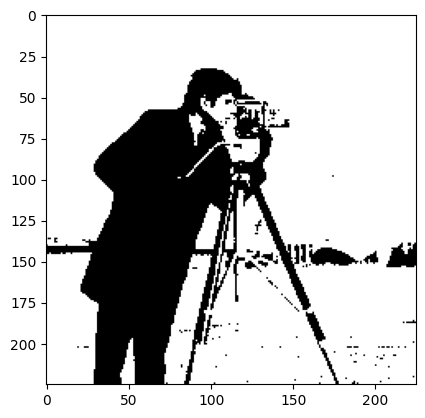

In [59]:
thresh, new_image = cv2.threshold(
    image, 86, max_value, cv2.THRESH_BINARY)
print('thresh:', thresh)
plt.imshow(new_image, cmap='gray');

thresh: 88.0


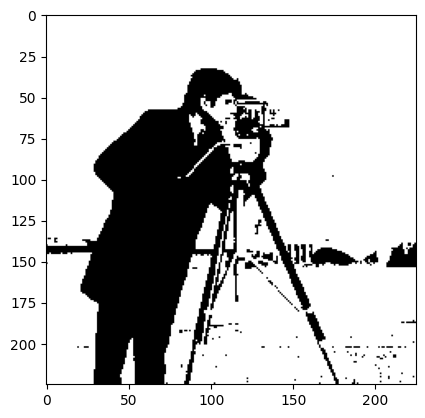

In [60]:
thresh, new_image = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)
print('thresh:', thresh)
plt.imshow(new_image, cmap='gray');